In [69]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,VGG19,ResNet50
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [13]:
dataset = 'Data'

In [14]:
INIT_LR = 1e-3
EPOCHS = 10
BS = 8

In [15]:
import numpy as np
import cv2
from imutils import paths
import os

In [16]:
args = {}
args['dataset'] = dataset

In [17]:
ipaths = list(paths.list_images(args['dataset'])) ##lists all images in path

data= []
labels = []

# label = ipaths[0].split(os.path.sep)

for ipath in ipaths:
    label = ipath.split(os.path.sep)[-2]
    image = cv2.imread(ipath)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(224,224))
    image = image/255.0
    data.append(image)
    labels.append(label)

data = np.array(data)
labels = np.array(labels)





In [90]:
# data

In [91]:
# labels

In [20]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [92]:
# labels

In [22]:
(x_train,x_test,y_train,y_test) = train_test_split(data,labels, test_size=0.2,random_state=42, stratify=labels)

In [23]:
# y_test

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [80]:
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

In [81]:
trainAug

# Model

In [82]:
# bModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))  #base_Model
# hModel = bModel.output #head_Model
# hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
# hModel = Flatten(name="flatten")(hModel)
# hModel = Dense(64, activation="relu")(hModel)
# hModel = Dropout(0.5)(hModel)
# hModel = Dense(2, activation="softmax")(hModel)
# model = Model(inputs=bModel.input, outputs=hModel)

# for layer in bModel.layers:
#     layer.trainable = False

In [85]:
pre_trained_model = InceptionV3(input_tensor=Input(shape=(224, 224, 3)),
                         include_top = False,
                         weights="imagenet")

for layer in pre_trained_model.layers:
    layer.trainable = False


last_layer = pre_trained_model.output

x = AveragePooling2D(pool_size=(4, 4))(last_layer)
x = Flatten(name="flatten")(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(2, activation="softmax")(x)
model = Model(inputs=pre_trained_model.input, outputs=x)


In [86]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 111, 111, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_188[0][0]    
____________________________________________________________________________________________

In [87]:
# model.summary()

In [88]:
opt = Adam(lr=INIT_LR,decay = INIT_LR/EPOCHS)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [89]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

R = model.fit_generator(
    trainAug.flow(x_train, y_train, batch_size=BS),
    steps_per_epoch=len(x_train) // BS,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // BS,
    epochs=EPOCHS)

  ...
    to  
  ['...']
Train for 20 steps, validate on 40 samples
Epoch 1/10
20/20 [==============================] - 38s 2s/step - loss: 1.0269 - accuracy: 0.5500 - val_loss: 1.0752 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 21s 1s/step - loss: 0.5447 - accuracy: 0.7312 - val_loss: 0.5841 - val_accuracy: 0.5750
Epoch 3/10
20/20 [==============================] - 19s 955ms/step - loss: 0.4352 - accuracy: 0.8250 - val_loss: 0.5079 - val_accuracy: 0.6750
Epoch 4/10
20/20 [==============================] - 19s 943ms/step - loss: 0.4466 - accuracy: 0.8125 - val_loss: 0.2315 - val_accuracy: 0.9500
Epoch 5/10
20/20 [==============================] - 18s 910ms/step - loss: 0.3819 - accuracy: 0.8687 - val_loss: 0.6097 - val_accuracy: 0.6750
Epoch 6/10
20/20 [==============================] - 18s 891ms/step - loss: 0.2907 - accuracy: 0.8813 - val_loss: 0.3202 - val_accuracy: 0.8750
Epoch 7/10
20/20 [==============================] - 18s 892ms/step - loss: 0.262

In [94]:
model.save('InceptionCovid_detection.h5')

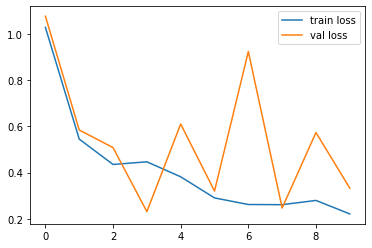

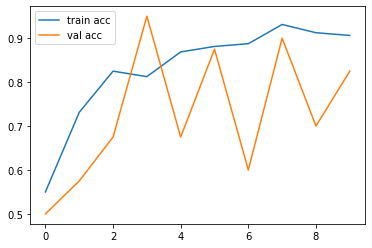

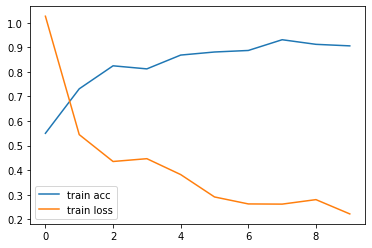

<Figure size 432x288 with 0 Axes>

In [95]:
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('accuracy')

#Loss vs Accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['loss'], label='train loss')
plt.legend()
plt.show()
plt.savefig('accuracy vs loss')



In [36]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test.argmax(axis=1), y_pred,target_names=lb.classes_))

              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00        20
      Normal       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)

In [38]:
cm

array([[20,  0],
       [ 0, 20]], dtype=int64)

In [39]:
import tensorflow as tf
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('Covid_detection.h5')
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [76]:
img = image.load_img('C:\\Users\\PAVAN\\Untitled Folder\\Corona Detection\\Data\\Covid\\1-s2.0-S1684118220300682-main.pdf-002-a1.png',target_size=(224,224))

In [77]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
# x

In [78]:
img_data = preprocess_input(x)
img_data = img_data/255
# img_data

Covid


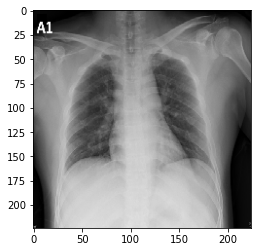

In [79]:
res = model.predict(img_data)
plt.imshow(img)
ans = np.argmax(res)
ans
if ans==0:
    print("Covid")
else:
    print("Normal")